# Lab 5 - Ensembles 
Here is what we will do:
1. Create a data set with two input features and a 3 category target
2. Train a decision tree on the data set for a baseline
3. Train 3 ensemble models
    - Serial Ada Boosted DT
    - Decision Forest
    - Ensemble of DT, SVM, and NN
3. Get model performance on train and test sets
4. Create appropriate graphs
5. Do a 10 fold cross validation with 

### Prepare the data

### Settings for the generated dataset
This data set will be spirals with noise
arms - This is the number of categories we will have
turns - How many times we go around the spiral
width - How wide is the spiral (percentage of the radius)
noise - How much noise we will add to the data.
size - The number of points to generate

In [27]:
arms = 5
turns = 1.5
width = 0.3
noise = .25
size = 4000

### The spirals will be based on the equation r=theta

Build set
Arm 0
Using offset 0.0
Arm 1
Using offset 1.2566370614359172
Arm 2
Using offset 2.5132741228718345
Arm 3
Using offset 3.7699111843077517
Arm 4
Using offset 5.026548245743669


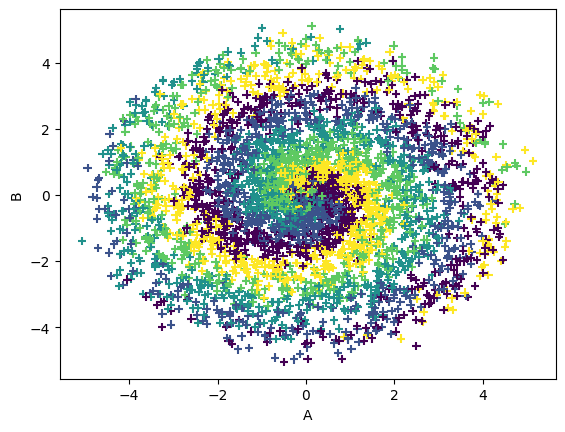

In [28]:
import numpy as np
import pandas as pd


def build_arm(n):
    print("Arm", n)
    points_per_arm = int(size/arms)
    #Get points on the curve
    theta_values = np.random.uniform(0, np.pi*turns, points_per_arm)
    r_values = theta_values
    target_values = [n] * points_per_arm
    
    #Add make the arm wider
    lower_fraction = (1 - width)*theta_values
    upper_fraction = (1 + width)*theta_values
    difference = upper_fraction - lower_fraction
    location = np.random.uniform(0, 1, points_per_arm)
    theta_values = theta_values + lower_fraction + difference*location
    
    #offset angle 
    offset = n*2*np.pi/arms
    print('Using offset', offset)
    theta_values = theta_values + offset
    
    #draw the noise from a distribution centered on 0.0 with a standard deviation of noise
    x_noise_values = np.random.normal(0, noise, points_per_arm)
    y_noise_values = np.random.normal(0, noise, points_per_arm)
    x_values = r_values * np.sin(theta_values) + x_noise_values
    y_values = r_values * np.cos(theta_values) + y_noise_values
    
    
    return x_values, y_values, target_values
    

def build_set():
    data_x = np.array([])
    data_y = np.array([])
    data_t = np.array([])
    print("Build set")
    for i in range(0,arms):
        x, y, t = build_arm(i)
        #print(data_x)
        #print(x)
        #print(y)
        #print(t)
        # add each arm to the data set
        data_x=np.append(data_x, x)
        data_y=np.append(data_y, y)
        data_t=np.append(data_t, t)
     # create a dictionary with each feature
    d = {}
    d["A"] = data_x
    d["B"] = data_y
    d["Class"] = data_t

    #print(d)

    # Create the data frame from the dictionary
    
    dataframe = pd.DataFrame(data=d)
    return dataframe
    

spiral = build_set()

import matplotlib.pyplot as plt

#shuffle before plotting so we don't always overwrite with the same color
shuffled = spiral.sample(frac=1)
plt.scatter(shuffled['A'], shuffled['B'], c=shuffled['Class'], marker='+')

plt.xlabel('A')
plt.ylabel('B')
plt.show()
    




### Stratified Test/Train Data Split

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_indices, test_indices in splitter.split(spiral, spiral['Class']):
    train_set = spiral.iloc[train_indices]
    test_set = spiral.iloc[test_indices]
    



### Cross Validate a Decision Tree model 

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
accuracy_list = np.array([])
f1_list = np.array([])
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)
for train_indices, test_indices in splitter.split(spiral, spiral['Class']):
    train_set = spiral.iloc[train_indices]
    test_set = spiral.iloc[test_indices]
    
for train_indices, validate_indices in splitter.split(spiral,
spiral['Class']):
 train_set = spiral.iloc[train_indices]
 validate_set = spiral.iloc[validate_indices]
 X = train_set[['A','B' ]]
 y = train_set['Class']
 X_validate = validate_set[['A','B']]
 y_validate = validate_set['Class']

 model = DecisionTreeClassifier()
 model.fit(X,y)
 y_validate_pred = model.predict(X_validate)
 accuracy = accuracy_score(y_validate, y_validate_pred)
 print("Confusion Matrix")
 print(confusion_matrix(y_validate, y_validate_pred))
 print('Accuracy is ', accuracy)

 accuracy_list = np.insert(accuracy_list, 0, accuracy)

print("Accuracy values", accuracy_list)
print(" Average of ", np.average(accuracy_list))
print(" StDev of ", np.std(accuracy_list))

Confusion Matrix
[[100  22  12]
 [  7 115  11]
 [ 20  11 102]]
Accuracy is  0.7925
Confusion Matrix
[[111  12  11]
 [ 21  99  13]
 [ 24  12  97]]
Accuracy is  0.7675
Confusion Matrix
[[101  21  12]
 [ 22  99  12]
 [ 19  19  95]]
Accuracy is  0.7375
Confusion Matrix
[[101  12  20]
 [ 23  97  14]
 [ 15  17 101]]
Accuracy is  0.7475
Confusion Matrix
[[109  10  14]
 [ 12 100  22]
 [ 17  12 104]]
Accuracy is  0.7825
Confusion Matrix
[[ 93  25  15]
 [ 16 101  17]
 [  9  16 108]]
Accuracy is  0.755
Confusion Matrix
[[96 21 16]
 [18 97 18]
 [21 14 99]]
Accuracy is  0.73
Confusion Matrix
[[101  18  14]
 [ 20 100  13]
 [ 11  14 109]]
Accuracy is  0.775
Confusion Matrix
[[ 95  17  21]
 [ 15  97  21]
 [ 11  22 101]]
Accuracy is  0.7325
Confusion Matrix
[[104  12  17]
 [ 24  97  12]
 [ 11  20 102]]
Accuracy is  0.7593984962406015
Accuracy values [0.7593985 0.7325    0.775     0.73      0.755     0.7825    0.7475
 0.7375    0.7675    0.7925   ]
 Average of  0.7579398496240601
 StDev of  0.0203603035

In [30]:
for train_indices, validate_indices in splitter.split(spiral,
spiral['Class']):
 train_set = spiral.iloc[train_indices]
 validate_set = spiral.iloc[validate_indices]
 X = train_set[['A','B' ]]
 y = train_set['Class']
 X_validate = validate_set[['A','B']]
 y_validate = validate_set['Class']

 model = DecisionTreeClassifier()
 model.fit(X,y)
 y_validate_pred = model.predict(X_validate)
 accuracy = accuracy_score(y_validate, y_validate_pred)
 print("Confusion Matrix")
 print(confusion_matrix(y_validate, y_validate_pred))
 print('Accuracy is ', accuracy)

 accuracy_list = np.insert(accuracy_list, 0, accuracy)

print("Accuracy values", accuracy_list)
print(" Average of ", np.average(accuracy_list))
print(" StDev of ", np.std(accuracy_list))

Confusion Matrix
[[73 35  5 12 35]
 [41 77 37  0  5]
 [ 6 41 71 38  4]
 [ 3  5 37 84 31]
 [31  4  3 32 90]]
Accuracy is  0.49375
Accuracy values [0.49375   0.7593985 0.7325    0.775     0.73      0.755     0.7825
 0.7475    0.7375    0.7675    0.7925   ]
 Average of  0.7339225905673273
 StDev of  0.07839096666236539


### Train and evaluate ADA boosted model

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  

X = train_set[['A','B' ]]
y = train_set['Class']

X_test = test_set[['A','B']]
y_test = test_set['Class']

ada_model =  AdaBoostClassifier(n_estimators=150)
ada_model.fit(X,y)

y_pred = ada_model.predict(X)


print('Results for ADA on train data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = ada_model.predict(X_test)
print('Results for ADA on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))




Results for ADA on train data
  Default settings
Confusion Matrix
[[661 232 174]
 [182 729 155]
 [172 212 682]]
Accuracy is   0.6477024070021882
Precision is  0.6490988426097669
Recall is     0.6477024070021882
F1 is         0.6476181640056895

Results for ADA on test data
  Default settings
Confusion Matrix
[[154  62  50]
 [ 44 167  56]
 [ 56  57 154]]
Accuracy is   0.59375
Precision is  0.5941591735036618
Recall is     0.59375
F1 is         0.5935769913738652


### Train and evaluate Random Forest model

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  

X = train_set[['A','B' ]]
y = train_set['Class']

X_test = test_set[['A','B']]
y_test = test_set['Class']

rf_model =  RandomForestClassifier(n_estimators=150)
rf_model.fit(X,y)

y_pred = rf_model.predict(X)


print('Results for  for Random Forest on train data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = rf_model.predict(X_test)
print('Results for  Random Forest on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))

Results for  for Random Forest on train data
  Default settings
Confusion Matrix
[[640   0   0   0   0]
 [  0 640   0   0   0]
 [  0   0 640   0   0]
 [  0   0   0 640   0]
 [  0   0   0   0 640]]
Accuracy is   1.0
Precision is  1.0
Recall is     1.0
F1 is         1.0

Results for  Random Forest on test data
  Default settings
Confusion Matrix
[[ 93  29   5   8  25]
 [ 35  90  31   1   3]
 [  6  33  79  39   3]
 [  0   6  33  89  32]
 [ 21   4   4  28 103]]
Accuracy is   0.5675
Precision is  0.5670336529531204
Recall is     0.5675
F1 is         0.5670973612499354


### Tanner Young

### Train and evaluate Voting model
We build it out of three different kinds of classifiers
One each of DT, SVC and NN

In [19]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
  
# Build the classifiers
vc1_dt = DecisionTreeClassifier()
vc2_svm = SVC()
vc3_nn = MLPClassifier(hidden_layer_sizes=(50, 25, 10),
 solver='lbfgs')

# Bundle into a list with names
vcList = [('DT',vc1_dt),
 ('SVM',vc2_svm),
 ('NN',vc3_nn)]


X = train_set[['A','B' ]]
y = train_set['Class']

X_test = test_set[['A','B']]
y_test = test_set['Class']

vc_model = VotingClassifier(vcList)
vc_model.fit(X,y)

y_pred = vc_model.predict(X)


print('Results for Voting Ensemble on train data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = vc_model.predict(X_test)
print('Results for Voting Ensemble  on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))




c:\Users\ksu09\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Results for Voting Ensemble on train data
  Default settings
Confusion Matrix
[[971  71  25]
 [ 63 938  65]
 [ 72  43 951]]
Accuracy is   0.8940293841825571
Precision is  0.8943675849573478
Recall is     0.8940293841825571
F1 is         0.8940471851654896

Results for Voting Ensemble  on test data
  Default settings
Confusion Matrix
[[203  28  35]
 [ 33 199  35]
 [ 37  16 214]]
Accuracy is   0.77
Precision is  0.7720491670344957
Recall is     0.77
F1 is         0.7701572517639295


### A Helpful plotting function for showing true and false for the categories

In [5]:
import matplotlib.pyplot as plt

def plot2FeatureBinaryConfusion(data_set, feature1Label, feature2Label, targetLabel, predicted, positive=1, negative=0):
## assumes that the target is 0/1

    
    target = data_set[targetLabel]
    
    # Filter with feature 1
    feature1_positives = np.ma.masked_where(target==negative, 
                     data_set[feature1Label])
    true_positive = np.ma.masked_where(predicted!=target, feature1_positives)
    false_negative = np.ma.masked_where(predicted==target, feature1_positives)
    feature1_negatives = np.ma.masked_where(target==positive, 
                     data_set[feature1Label])
    true_negative = np.ma.masked_where(predicted!=target, feature1_negatives)
    false_positive = np.ma.masked_where(predicted==target,feature1_negatives)

   
    feature2 = data_set[feature2Label]
    plt.scatter(true_positive, feature2, c='green', marker='o')
    plt.scatter(false_positive, feature2, c='red', marker='^')
    plt.scatter(true_negative, feature2, c='blue', marker='o')
    plt.scatter(false_negative, feature2, c='orange', marker='^')



    plt.xlabel(feature1Label)
    plt.ylabel(feature2Label)
    plt.legend(['True Positive', 'False Positive', 'True Negative', 'False Negative'])
    plt.show()

### Train and evaluate Decision Tree model 

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  

X = train_set[['A','B' ]]
y = train_set['Class']

X_test = test_set[['A','B']]
y_test = test_set['Class']

tree_model = DecisionTreeClassifier()
tree_model.fit(X,y)

y_pred = tree_model.predict(X)
print('Results for decision tree on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = tree_model.predict(X_test)
print('Results for decision tree on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))



Results for decision tree on training data
  Default settings
Confusion Matrix
[[1067    0    0]
 [   0 1066    0]
 [   0    0 1066]]
Accuracy is   1.0
Precision is  1.0
Recall is     1.0
F1 is         1.0

Results for decision tree on test data
  Default settings
Confusion Matrix
[[186  41  39]
 [ 31 204  32]
 [ 39  29 199]]
Accuracy is   0.73625
Precision is  0.7360535438209651
Recall is     0.73625
F1 is         0.7360149127126872


### Train and evaluate SVC model 

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  

X = train_set[['A','B' ]]
y = train_set['Class']

X_test = test_set[['A','B']]
y_test = test_set['Class']

svc_model = SVC()
svc_model.fit(X,y)

y_pred = svc_model.predict(X)
print('Results for svc on training data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = svc_model.predict(X_test)
print('Results for svc on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))



Results for svc on training data
  Default settings
Confusion Matrix
[[784 138 145]
 [171 754 141]
 [142 121 803]]
Accuracy is   0.7317911847452329
Precision is  0.7321191851340882
Recall is     0.7317911847452329
F1 is         0.7317232504047924

Results for svc on test data
  Default settings
Confusion Matrix
[[198  37  31]
 [ 38 200  29]
 [ 53  22 192]]
Accuracy is   0.7375
Precision is  0.739810490173812
Recall is     0.7375
F1 is         0.7379819407970356


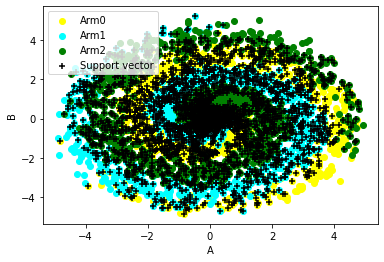

In [9]:
import matplotlib.pyplot as plt
arm0_A = np.ma.masked_where(spiral['Class']!=0, 
                     spiral['A'])

arm1_A = np.ma.masked_where(spiral['Class']!=1, 
                     spiral['A'])

arm2_A = np.ma.masked_where(spiral['Class']!=2, 
                     spiral['A'])



# get the values for the support vectors (the special instances)
support_x = [x for (x,y) in svc_model.support_vectors_]
support_y = [y for (x,y) in svc_model.support_vectors_]




b = spiral['B']
plt.scatter(arm0_A, b, c='yellow', marker='o')
plt.scatter(arm1_A, b, c='cyan', marker='o')
plt.scatter(arm2_A, b, c='green', marker='o')
plt.scatter(support_x, support_y, c='black', marker='+')

plt.xlabel('A')
plt.ylabel('B')
plt.legend(['Arm0', 'Arm1', 'Arm2','Support vector'])
plt.show()

### Train and evaluate Neural Net model 

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
  

X = train_set[['A','B' ]]
y = train_set['Class']

X_test = test_set[['A','B']]
y_test = test_set['Class']

nn_model = MLPClassifier(hidden_layer_sizes=(50, 25, 10),
                         solver='lbfgs')
nn_model.fit(X,y)

y_pred = nn_model.predict(X)


print('Results for NN on train data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y, y_pred))
print('Accuracy is  ', accuracy_score(y, y_pred))
print('Precision is ', precision_score(y, y_pred, average='weighted'))
print('Recall is    ', recall_score(y,y_pred, average='weighted'))
print('F1 is        ', f1_score(y, y_pred, average='weighted'))
print()

y_test_pred = nn_model.predict(X_test)
print('Results for NN on test data')
print('  Default settings')
print("Confusion Matrix")
print(confusion_matrix(y_test, y_test_pred))
print('Accuracy is  ', accuracy_score(y_test, y_test_pred))
print('Precision is ', precision_score(y_test, y_test_pred, average='weighted'))
print('Recall is    ', recall_score(y_test,y_test_pred, average='weighted'))
print('F1 is        ', f1_score(y_test, y_test_pred, average='weighted'))




Results for NN on train data
  Default settings
Confusion Matrix
[[893 100  74]
 [ 90 887  89]
 [ 83  84 899]]
Accuracy is   0.8374492028758987
Precision is  0.8374750813911612
Recall is     0.8374492028758987
F1 is         0.837459571593907

Results for NN on test data
  Default settings
Confusion Matrix
[[209  36  21]
 [ 23 215  29]
 [ 33  21 213]]
Accuracy is   0.79625
Precision is  0.7963450213614572
Recall is     0.79625
F1 is         0.7962583875241718


/Users/ios/ds-venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# Results
Basic results for our classification model to predict arm on the spiral data set

| Model | Training Features | Acc Train | F1 Train |Acc Test | F1 Test |
|:---|:---|:---|:---|:---|:---|
|Decision Tree|A,B|100.0|100.0|71.62 | 71.63 |
|SVC|A,B|71.58|71.58|70.5|70.42|
|MLP|A,B layers (50,25,10) lbfgs|80.06|80.13|77.87|77.91
|ADA|A,B 150 estimators|65.02|65.01|60.5|60.47|